# Identification of Age-related Macular Degeneration among Retinal Images obtained via Optical Coherence Tomography

## By Rami Dabit and Terry Wang

UCSB ECE 194N/594N Nina Miolane

***

## Question

**Given some sets of retinal OCT image data, is it possible to computationally aid ophthalmologists in tasks such as identification of age-related macular degeneration using anatomical landmark detection and shape analysis?**

## I. Introduction

Age-related macular degeneration (AMD) is an eye disease and leading cause of vision loss for older adults affecting approximately one in ten Americans aged 50 and older. Blurring the central vision, AMD can make it difficult for a patient to see details straight ahead or in low lighting. With age, one may notice that lines in their central field of view begin to appear wavy or crooked, and many with AMD experience a growing area of blurriness or even blank spot in their central vision later in life.

This disease is characterized by damage to the retina, the light-sensitive tissue at the back of the eye, and with shape analysis, it may be possible to identify AMD using common imaging techniques in the field of ophthalmology; for example, Optical Coherence Tomography (OCT), which captures a number of slices of the region of interest (i.e., retina of patients in a study). The OCTID dataset offers three image sets of interest: 206 fovea-centered OCT images of healthy adult retina [[3]](https://doi.org/10.5683/SP/WLW4ZT), 55 fovea-centered OCT images of adult retina diagnosed with AMD [[4]](https://doi.org/10.5683/SP/YEM3RA), and 102 fovea-centered OCT images of adult retina containing a macular hole [[5]](https://doi.org/10.5683/SP/MBMQGD), an indicator of potential age-related macular degeneration.

![Sample OCT Images](https://i.imgur.com/QRWjZCA.png)

## II. Related work

Although Optical Coherence Tomography was first introduced in 1991 and is a widely used imaging modality, the topic of AMD identification using such image slices has not been thoroughly explored. Only one piece of literature by Arabi et al. [[1]](https://doi.org/10.1088/1757-899X/310/1/012096) can be found on Google Scholar, where they propose a methodology of filtering grayscale versions of OCT retinal images with a Gaussian filter, enhancing using contrast stretching, and thresholding the foreground of the retina from the darker background. Then, the Retinal Pigmented Epithelium (RPE) layer is extracted and divided into eight sub-images or quadrants. Finally, the mean pixel value is calculated across the quadrants and an average mean *M* is calculated for a pair of healthy-labeled and amd-labeled images using these mean pixel values. For use as a decision rule, an *M* value greater than 125 classifies an retinal image as healthy; otherwise, the retina is classified with an AMD diagnosis.

Ghesu et al. [[2]](https://doi.org/10.1007/978-3-319-46726-9_27) instead propose a general approach for anatomical landmark detection in medical images, where such landmarks act as indicators of potential disease. Object appearance is modeled simultaneously alongside a parameter search strategy as a unified behavioral task for an artifical agent. This is achieved by way of reinforcement learning for image parsing with hierarchical feature extraction via deep learning, which the authors claim is more optimal than exhaustively scanning the entire solution space. However, in the case of AMD in retinal OCT images, the latter method may be better suited to tackle the data given that a patient with a positive diagnosis will have points of hole discontinuity in the retinal scans. For this reason, we attempted the approach proposed by Arabi et al. [[1]](https://doi.org/10.1088/1757-899X/310/1/012096), but found it unreliable for landmark detection in our dataset; rather, we proceeded with our own implementation of contour extraction based on the inner and outer segment junction. The IS/OS line lies at the junction between the photoreceptor outer and inner segments, where a disturbed IS/OS line integrity serves as an indicator for not only AMD, but for many other retinal diseases as well.

## III. Approach

**Imports and setup**

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from PIL import Image

import preprocessing as pre
import is_os_line as isos
%matplotlib inline

nb_path = os.path.abspath("identification_of_amd.ipynb")

In [2]:
images_normal = pre.load_images("data/OCTID_NORMAL")
images_amd = pre.load_images("data/OCTID_AMD")
images_mh = pre.load_images("data/OCTID_MH")

**IS/OS line extraction**

In [3]:
is_os_lines_normal = []
for i in range(len(images_normal)):
    img = pre.remove_background(images_normal[i])
    is_os_line = isos.extract_is_os_line(img)
    is_os_lines_normal.append(is_os_line)

is_os_lines_amd = []
for i in range(len(images_amd)):
    img = pre.remove_background(images_amd[i])
    is_os_line = isos.extract_is_os_line(img)
    is_os_lines_amd.append(is_os_line)

is_os_lines_mh = []
for i in range(len(images_mh)):
    img = pre.remove_background(images_mh[i])
    is_os_line = isos.extract_is_os_line(img)
    is_os_lines_mh.append(is_os_line)

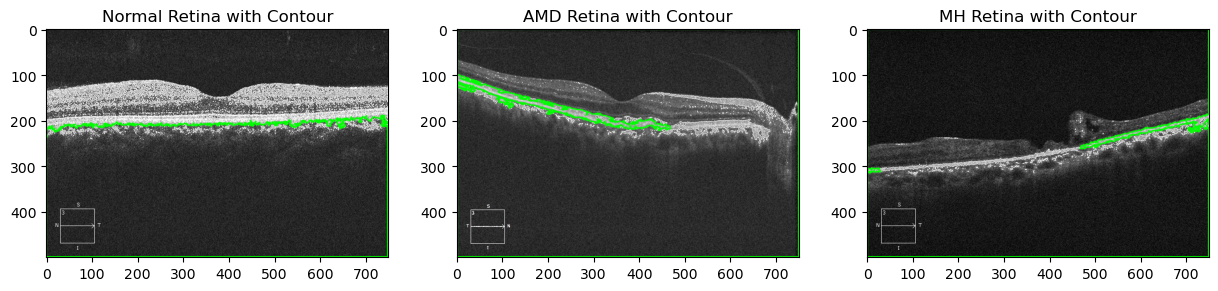

In [4]:
image_copy_normal = images_normal[0].copy()
cv2.drawContours(image=image_copy_normal, contours=is_os_lines_normal[0], 
                 contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

image_copy_amd = images_amd[0].copy()
cv2.drawContours(image=image_copy_amd, contours=is_os_lines_amd[0], 
                 contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

image_copy_mh = images_mh[0].copy()
cv2.drawContours(image=image_copy_mh, contours=is_os_lines_mh[0], 
                 contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

plt.rcParams['figure.figsize'] = (15,15)
fig, ax = plt.subplots(1,3)
ax[0].imshow(image_copy_normal)
ax[0].set_title('Normal Retina with Contour')
ax[1].imshow(image_copy_amd)
ax[1].set_title('AMD Retina with Contour')
ax[2].imshow(image_copy_mh)
ax[2].set_title('MH Retina with Contour')
plt.show()

Prior to extracting the IS/OS line contour shape, we draw it over some sample input retinal scans to demonstrate a disturbance in patients with AMD and macular holes. As a general rule of thumb, we determine that patients with normal retinas will have a complete contour stretching from left-to-right.

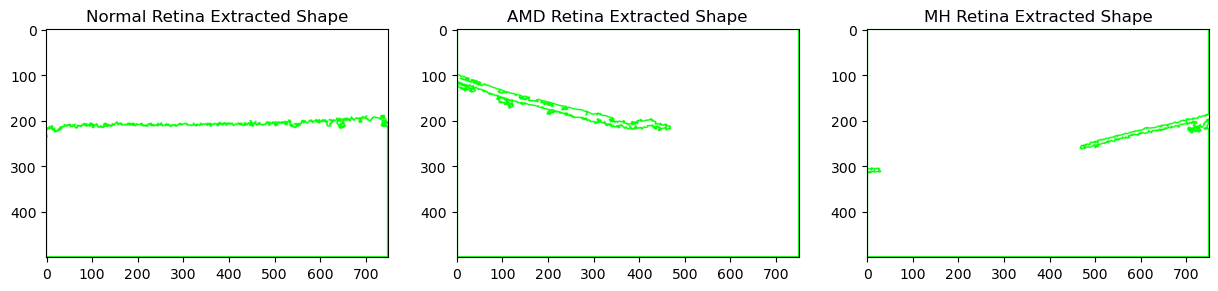

In [5]:
image_copy_normal = 255 + np.zeros_like(images_normal[0])
cv2.drawContours(image=image_copy_normal, contours=is_os_lines_normal[0], 
                 contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

image_copy_amd = 255 + np.zeros_like(images_amd[0])
cv2.drawContours(image=image_copy_amd, contours=is_os_lines_amd[0], 
                 contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

image_copy_mh = 255 + np.zeros_like(images_mh[0])
cv2.drawContours(image=image_copy_mh, contours=is_os_lines_mh[0], 
                 contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

fig, ax = plt.subplots(1,3)
ax[0].imshow(image_copy_normal)
ax[0].set_title('Normal Retina Extracted Shape')
ax[1].imshow(image_copy_amd)
ax[1].set_title('AMD Retina Extracted Shape')
ax[2].imshow(image_copy_mh)
ax[2].set_title('MH Retina Extracted Shape')
plt.show()

**Shape analysis and comparison**

In [6]:
# Top-side tolerance
tol_top = 15
# Bottom-side tolerance
tol_bot = 25
# Left-hand tolerance
tol_left = 15
# Right-hand tolerance
tol_right = 25

def diff_y(img):
    """Compute vertical width of IS/OS line at each column."""
    diff_y = []
    num_rows, num_cols, _ = img.shape
    for j in range(num_cols-tol_left-tol_right):
        y_min = 0
        y_max = 0
        for i in range(num_rows-tol_top-tol_bot):
            if img[i+tol_top,j+tol_left,0] == 0 and img[i+tol_top,j+tol_left,1] == 255:
                y_min = i+tol_top
                break
        for i in range(num_rows-y_min-tol_top-tol_bot):
            if img[i+y_min,j+tol_left,0] == 0 and img[i+y_min+tol_top,j+tol_left,1] == 255:
                y_max = i+y_min+tol_top
        diff_y.append(y_max-y_min-1-tol_top)
    return diff_y

In [7]:
vwidth_normal = diff_y(image_copy_normal)
vwidth_amd = diff_y(image_copy_amd)
vwidth_mh = diff_y(image_copy_mh)

def remove_value(input_list, value):
    return [x for x in input_list if x != value]

normal_nonzero = remove_value(vwidth_normal, 0)
amd_nonzero = remove_value(vwidth_amd, 0)
mh_nonzero = remove_value(vwidth_mh, 0)

print('Average contour thickness (normal): '+ str(sum(vwidth_normal) / len(normal_nonzero)))
print('Average contour thickness (amd): '   + str(sum(vwidth_amd)    / len(amd_nonzero)))
print('Average contour thickness (mh): '    + str(sum(vwidth_mh)     / len(mh_nonzero)))

Average contour thickness (normal): 4.185915492957746
Average contour thickness (amd): 18.295154185022028
Average contour thickness (mh): 11.08029197080292


We have now achieved our first metric for shape comparison, but keeping in mind that patients with positive AMD diagnoses will have a disturbance in their IS/OS lines, we must also measure the distance of the largest horizontal gap in the contour.

In [8]:
# Keeping the same tolerances for top, bottom, left, and right...

def diff_x(img):
    """Compute horizontal width of largest gap in IS/OS line."""
    diff_x = []
    num_rows, num_cols, _ = img.shape
    for i in range(num_rows-tol_top-tol_bot):
        current_gap = 0
        largest_gap = 0
        for j in range(num_cols-tol_left-tol_right):
            if all(img[i+tol_top,j+tol_left,0] == [255,255,255]):
                current_gap += 1
                if current_gap > largest_gap:
                    largest_gap = current_gap
            else:
                current_gap = 0
        diff_x.append(largest_gap)
    return diff_x

In [9]:
hwidth_normal = diff_x(image_copy_normal)
hwidth_amd = diff_x(image_copy_amd)
hwidth_mh = diff_x(image_copy_mh)

hwidth_normal_nonmax = remove_value(hwidth_normal, max(hwidth_normal))
hwidth_amd_nonmax = remove_value(hwidth_amd, max(hwidth_amd))
hwidth_mh_nonmax = remove_value(hwidth_mh, max(hwidth_mh))

print('Average largest gap in contour line (normal): '+ str(sum(hwidth_normal_nonmax) / len(hwidth_normal_nonmax)))
print('Average largest gap in contour line (amd): '   + str(sum(hwidth_amd_nonmax)    / len(hwidth_amd_nonmax)))
print('Average largest gap in contour line (mh): '    + str(sum(hwidth_mh_nonmax)     / len(hwidth_mh_nonmax)))

Average largest gap in contour line (normal): 417.35897435897436
Average largest gap in contour line (amd): 498.0983606557377
Average largest gap in contour line (mh): 574.2619047619048


Now we are ready to plot and compare the shape information of the IS/OS line landmark we have detected.

(Although, some future refinement is clearly needed here to account for normal retina with large areas of continuity.)

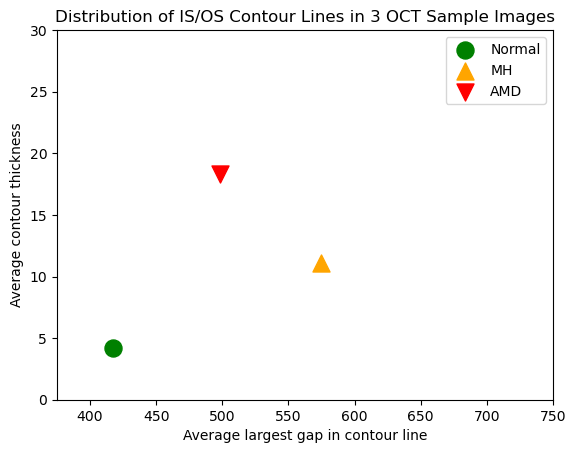

In [10]:
x_normal = sum(hwidth_normal_nonmax) / len(hwidth_normal_nonmax)
x_amd = sum(hwidth_amd_nonmax) / len(hwidth_amd_nonmax)
x_mh = sum(hwidth_mh_nonmax) / len(hwidth_mh_nonmax)
x_data = np.array([x_normal, x_amd, x_mh])

y_normal = sum(vwidth_normal) / len(normal_nonzero)
y_amd = sum(vwidth_amd) / len(amd_nonzero)
y_mh = sum(vwidth_mh) / len(mh_nonzero)
y_data = np.array([y_normal, y_amd, y_mh])

group = np.array(['Normal', 'AMD', 'MH'])
cdict = {'Normal': 'green', 'AMD': 'red', 'MH': 'orange'}
mdict = {'Normal': 'o', 'AMD': 'v', 'MH': '^'}

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
fig, ax = plt.subplots()
for g in np.unique(group):
    idx = np.where(group == g)
    ax.scatter(x_data[idx], y_data[idx], c=cdict[g], marker=mdict[g], label=g, s=150)
ax.set_title('Distribution of IS/OS Contour Lines in 3 OCT Sample Images')
ax.set_xlabel('Average largest gap in contour line')
ax.set_ylabel('Average contour thickness')
ax.set_xlim(375, 750)
ax.set_ylim(0, 30)
order = [2, 1, 0]
handles, labels = plt.gca().get_legend_handles_labels()
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.show()

## IV. Results

In the above approach, we have analyzed Optical Coherence Tomography Imade Data [[3]](https://doi.org/10.5683/SP/WLW4ZT) [[4]](https://doi.org/10.5683/SP/YEM3RA) [[5]](https://doi.org/10.5683/SP/MBMQGD) based on the shape of foveae, or possibly macular holes, found in the retina of adult patients. By performing landmark detection of the inner and outer segment junction of the retina, we were able to extract contours of the IS/OS line in retinal scans of healthy adults, adults with AMD, and adults with the potential of development AMD due to presence of a macular hole.

In this shape experiment, we chose to focus on three sample images coming from each category, though we plan to modularize this early code such that it may be applied to the whole dataset. As it stands, we have produced the hypothesis that patients who are at risk of losing their vision due to AMD are likely to have large gaps in their IS/OS contour lines, as well as a greater thickness of this line stemming from an unusual contour shape. Meanwhile, adults with healthy vision are more likely to have slim and straight retinas with intact foveas, placing their marker in the lower left of the plot. With this information, ophthalmologists may be able to detect outliers and warn patients of the potential damage to their central field of vision.

## V. Future Directions

Moving forward, we aim to expand on our current progress in tackling the biomedical question at hand by using geometric machine learning rather than a simple image-based shape extraction approach. Ghesu et al. [[2]](https://doi.org/10.1007/978-3-319-46726-9_27) propose a robust method for landmark extraction using reinforcement learning, which may prove to be a viable addition in future work. It is also our goal to refine and optimize the metrics produced above, and to ensure they work on a large number of images using the entirety of our datasets. While a human may be able to observe and analyze a plot for potential outliers, the goal of future work is to enable machines to do so automatically provided that they have enough data for training, validation, and testing of robustness on a larger scale.

## References

[[1]](https://doi.org/10.1088/1757-899X/310/1/012096) Arabi, Punal M., Nanditha Krishna, V. Ashwini, and H. M. Prathibha. "Identification of age-related macular degeneration using oct images." In *IOP Conference Series: Materials Science and Engineering,* vol. 310, no. 1, p. 012096. IOP Publishing, 2018.

[[2]](https://doi.org/10.1007/978-3-319-46726-9_27) Ghesu, Florin C., Bogdan Georgescu, Tommaso Mansi, Dominik Neumann, Joachim Hornegger, and Dorin Comaniciu. "An artificial agent for anatomical landmark detection in medical images." In *Medical Image Computing and Computer-Assisted Intervention-MICCAI 2016: 19th International Conference, Athens, Greece, October 17-21, 2016, Proceedings, Part III 19,* pp. 229-237. Springer International Publishing, 2016.

[[3]](https://doi.org/10.5683/SP/WLW4ZT) Gholami, Peyman; Roy, Priyanka; Lakshminarayanan, Vasudevan, 2018, "Normal Retinal OCT images", https://doi.org/10.5683/SP/WLW4ZT, Borealis, V1

[[4]](https://doi.org/10.5683/SP/YEM3RA) Gholami, Peyman; Roy, Priyanka; Lakshminarayanan, Vasudevan, 2018, "Age-related Macular Degeneration Retinal OCT images", https://doi.org/10.5683/SP/YEM3RA, Borealis, V1

[[5]](https://doi.org/10.5683/SP/MBMQGD) Gholami, Peyman; Roy, Priyanka; Lakshminarayanan, Vasudevan, 2018, "Macular Hole Retinal OCT images", https://doi.org/10.5683/SP/MBMQGD, Borealis, V1